In [ ]:
import torch # Importing PyTorch for neural networks and tensor operations
import torch.nn as nn  # Importing neural network modules
import torch.optim as optim  # Importing optimization algorithms
from torchvision import datasets, transforms  # Importing datasets and transformations from torchvision
from torch.utils.data import DataLoader  # Importing DataLoader for batch processing
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Define Dataset Transformations
def get_transform():
    return transforms.Compose([  # Chain multiple transformations
        transforms.ToTensor(),  # Convert images to tensors
        transforms.Normalize((0.5,), (0.5,))  # Normalize the images to the range [-1, 1]
    ])

# Load Datasets
def get_datasets(transform):
    train_dataset = datasets.MNIST( # Load the MNIST training dataset
        root='./data', # Store data in the './data' directory
        train=True,  # Specify that this is the training dataset
        download=True,  # Download the dataset if not present locally
        transform=transform  # Apply the defined transformations
    )
    test_dataset = datasets.MNIST( # Load the MNIST test dataset
        root='./data', # Store data in the './data' directory
        train=False, # Specify that this is the test dataset
        download=True,  # Download the dataset if not present locally
        transform=transform  # Apply the defined transformations
    )
    return train_dataset, test_dataset  # Return both the training and test datasets

# Create Data Loaders
def get_data_loaders(train_dataset, test_dataset, batch_size=64):
    train_loader = DataLoader(  # Create a DataLoader for the training data
        train_dataset, # Pass the training dataset
        batch_size=batch_size, # Set the batch size for training
        shuffle=True  # Shuffle the data for better training performance
    )
    test_loader = DataLoader(  # Create a DataLoader for the test data
        test_dataset,  # Pass the training dataset
        batch_size=batch_size,  # Set the batch size for training
        shuffle=False   # No need to shuffle the test data
    )
    return train_loader, test_loader  # Return both the training and test data loaders

# Combine Everything
# Apply transformations
transform = get_transform() # Get the transformation function

# Load datasets
train_dataset, test_dataset = get_datasets(transform)   # Load training and test datasets with applied transformations

# Create DataLoaders
train_loader, test_loader = get_data_loaders(train_dataset, test_dataset, batch_size=64)  # Create DataLoader objects for training and testing

# Optional: Check data
print(f"Number of training samples: {len(train_dataset)}") # Print the number of training samples
print(f"Number of test samples: {len(test_dataset)}") # Print the number of test samples
print(f"Batch size: {train_loader.batch_size}") # Print the batch size used in the DataLoader


Failed to download (trying next):
<urlopen error [Errno -5] No address associated with hostname>



100%|██████████| 9.91M/9.91M [00:00<00:00, 20.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno -5] No address associated with hostname>



100%|██████████| 28.9k/28.9k [00:00<00:00, 638kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.59MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.11MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of training samples: 60000
Number of test samples: 10000
Batch size: 64


In [ ]:
import torch # Importing PyTorch for tensor operations
import torch.nn as nn  # Importing PyTorch's neural network module
import torch.optim as optim # Importing PyTorch's optimization algorithms

# Define the LeNet-5 Model
class LeNet5(nn.Module):  # Define a class for the LeNet-5 model, inheriting from nn.Module
    def __init__(self): # Constructor method to initialize the model
        super(LeNet5, self).__init__() # Call the parent class's constructor

        # Feature extractor (convolutional layers and pooling layers)
        self.feature_extractor = nn.Sequential(
            # First convolution layer: Input: 1x28x28 -> Output: 6x28x28 (padding=2 keeps spatial dimensions)
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2), # Convolution with 1 input channel, 6 output channels
            nn.ReLU(),   # Apply ReLU activation function
            nn.AvgPool2d(kernel_size=2, stride=2),  # Average pooling with 2x2 kernel size and stride of 2

            # Second convolution layer: Input: 6x14x14 -> Output: 16x10x10
            nn.Conv2d(6, 16, kernel_size=5, stride=1), # Convolution with 6 input channels, 16 output channels
            nn.ReLU(),  # Apply ReLU activation function
            nn.AvgPool2d(kernel_size=2, stride=2)  # Average pooling with 2x2 kernel size and stride of 2
        )

        # Classifier (fully connected layers)
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),  # Fully connected layer: Input features: 16x5x5, Output: 120
            nn.ReLU(), # Apply ReLU activation function
            nn.Linear(120, 84),  # Fully connected layer: Input: 120, Output: 84
            nn.ReLU(), # Apply ReLU activation function
            nn.Linear(84, 10) # Output layer: 10 output classes (for 10 digits in MNIST)
        )

    def forward(self, x):  # Define the forward pass
        x = self.feature_extractor(x)  # Pass input through the convolutional layers
        x = x.view(-1, 16 * 5 * 5)     # Flatten the output for the fully connected layers
        x = self.classifier(x)         # Pass through the fully connected layers
        return x

# Initialize Model, Loss, and Optimizer
def initialize_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   # Check if GPU is available and select device
    model = LeNet5().to(device)  # Instantiate the LeNet5 model and move it to the selected device (GPU/CPU)
    criterion = nn.CrossEntropyLoss()  # Define loss function: CrossEntropyLoss (combines softmax and negative log likelihood)
    optimizer = optim.Adam(model.parameters(), lr=0.001)   # Use Adam optimizer with learning rate of 0.001
    return model, criterion, optimizer, device  # Return the model, loss function, optimizer, and device

# Get the initialized model, loss, and optimizer
model, criterion, optimizer, device = initialize_model() # Call the initialization function to get model and related components

# Optional: Model Summary
print(model) # Print the model architecture to inspect its structure


In [ ]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, epochs=10, device='cpu'):
    model.to(device)  # Move the model to the specified device
    model.train()    # Set the model to training mode (enables dropout, batch normalization, etc.)

    # Loop over epochs (train the model for a specified number of epochs)
    for epoch in range(1, epochs + 1):
        epoch_loss = 0.0  # Initialize a variable to accumulate loss during the epoch

        # Iterate over training data
        for batch in train_loader:
            images, labels = batch  # Unpack the images and labels from the batch
            images, labels = images.to(device), labels.to(device)  # Move data to the selected device (CPU/GPU)

            optimizer.zero_grad()    # Zero out the gradients from the previous step
            outputs = model(images)        # Perform a forward pass through the model to get predictions
            loss = criterion(outputs, labels)  # Compute the loss between predicted outputs and the true labels
            loss.backward()        # Backpropagate the error (calculate gradients)
            optimizer.step()   # Update the model weights using the optimizer

            epoch_loss += loss.item() # Accumulate the loss for the current batch

        # After processing all batches in the current epoch, calculate and print the average loss
        avg_loss = epoch_loss / len(train_loader) # Average loss for the current epoch
        print(f"Epoch {epoch}/{epochs}, Average Loss: {avg_loss:.4f}")



In [ ]:
# Function to evaluate the model on the test data
def evaluate_model(model, test_loader, device='cpu'):
    model.to(device)  # Ensure the model is on the correct device
    model.eval()      # Set the model to evaluation mode

    correct_predictions = 0  # Counter for correct predictions
    total_samples = 0        # Counter for total samples

    # Disable gradient computation for evaluation
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device

            # Forward pass to get predictions
            outputs = model(images)

            # Get the predicted class index for each sample
            predicted_labels = torch.argmax(outputs, dim=1)

            # Update counters
            total_samples += labels.size(0)
            correct_predictions += (predicted_labels == labels).sum().item()

    # Calculate accuracy as a percentage
    accuracy = 100 * correct_predictions / total_samples
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# Train and evaluate the model
train_model(model, train_loader, criterion, optimizer, epochs=10, device=device)
accuracy = evaluate_model(model, test_loader, device=device)


Epoch 1/10, Average Loss: 0.2688
Epoch 2/10, Average Loss: 0.0771
Epoch 3/10, Average Loss: 0.0555
Epoch 4/10, Average Loss: 0.0461
Epoch 5/10, Average Loss: 0.0388
Epoch 6/10, Average Loss: 0.0334
Epoch 7/10, Average Loss: 0.0282
Epoch 8/10, Average Loss: 0.0240
Epoch 9/10, Average Loss: 0.0204
Epoch 10/10, Average Loss: 0.0197
Test Accuracy: 98.93%


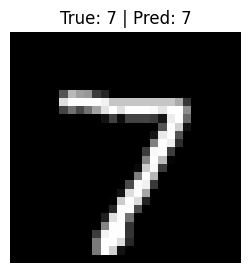

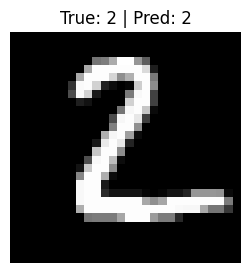

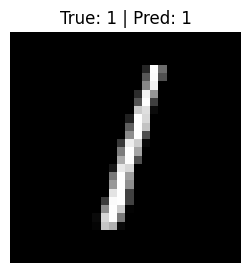

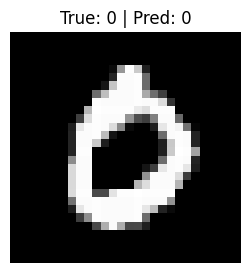

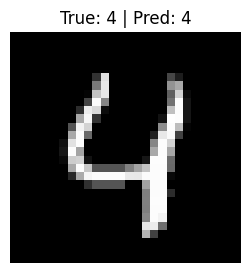

In [ ]:
# Function to make predictions and visualize the results
def visualize_predictions(model, test_loader, num_samples=5, device='cpu'):
    model.to(device)  # Ensure the model is on the correct device
    model.eval()      # Set the model to evaluation mode

    # Fetch a batch of test samples
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    # Limit the number of samples to `num_samples`
    images, labels = images[:num_samples], labels[:num_samples]

    # Move data to the appropriate device
    images, labels = images.to(device), labels.to(device)

    # Get the model's predictions
    with torch.no_grad():
        outputs = model(images)
        predicted_labels = torch.argmax(outputs, dim=1)

    # Convert images to NumPy for visualization
    images = images.cpu().numpy()

    # Plot the images with their true and predicted labels
    for i in range(num_samples):
        plt.figure(figsize=(3, 3))  # Set figure size for better clarity
        plt.imshow(images[i][0], cmap='gray')  # Display the image in grayscale
        plt.title(
            f"True: {labels[i].item()} | Pred: {predicted_labels[i].item()}",
            fontsize=12,
        )  # Set a detailed title
        plt.axis('off')  # Turn off axes for a cleaner look
        plt.show()  # Display the image

# Call the function to visualize predictions
visualize_predictions(model, test_loader, num_samples=5, device=device)
